# MNIST classification with a simple neural network

**You will learn to:**
- Build the general architecture of a neural network using TensorFlow, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) to update the parameters
- Make predictions and check the accuracy of your classification.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs & GPUs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## 2 - Overview of the MNIST data set ##

We'll be using a dataset known as MNIST containing:
    - a training set of 55000 images of handwritten digits labeled with the correspoding number
    - a test set of 10000 images labeled with the correct number
    - each image is of shape (28, 28). Thus, each image is square (height = 28) and (width = 28).

You will build a simple image-recognition algorithm that can correctly classify the images among 10 categories i.e. 0,1,2,3,4,5,6,7,8,9.

Let's get more familiar with the dataset. Load the data by running the following code.

In [30]:
# Loading the dataset
mnist = input_data.read_data_sets("MNIST/", one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [4]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

Each line of `mnist.train.images` and `mnist.test.images` is an array representing an image. 

The images have been flattened i.e. converted from 28 x 28 array to 784.

Each line of `mnist.train.labels.shape` and `mnist.test.labels.shape` is a array size 10, because the class labels are in [one-hot encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) form.

You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

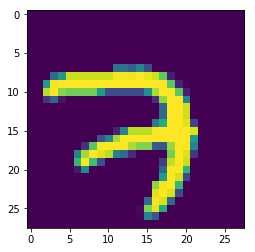

In [5]:
# Example of an image
index = 0
first_image = mnist.train.images[index]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

## 3 - Neural Network model using TensorFlow

We are going to train a Neural Network with two hidden layers.

The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( no. of input units,  no. of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

### 3.1 - Defining the neural network structure ####

Define three variables:
    - n_input: the size of the input layer
    - n_h1: the size of the first hidden layer (randomly taken to be 400, try different values)
    - n_h2: the size of the first hidden layer (randomly taken to be 200)
    - n_classes: the size of the output layer

In [6]:
n_input = 784
n_h1 = 400
n_h2 = 200
n_classes = 10

### 3.2 - Initialize the model's parameters ####

- We will initialize the weights matrices with random values in the form of a dictionary. 
    - We use: `tf.random_normal([a,b])` to initialize a matrix of shape (a,b) with random values from a normal distribution.
- We will initialize these weight matrices as TensorFlow variable to add it to the computation graph. 
    - We use: `tf.Variable(M)` to initialize a matrix M as a TensorFlow tensor.

In [7]:
wts = {
    'h1': tf.Variable(tf.random_normal([n_input, n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h1, n_h2])),
    'output': tf.Variable(tf.random_normal([n_h2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h2])),
    'output': tf.Variable(tf.random_normal([n_classes]))
}

### 3.3 - Forward Propagation module ####

We implement a `forward_propagation()` function to do the matrix multiplications and predict outputs labels for the images.

- The steps we implement are:
    1. Retrieve each weight and bias from the dictionaries "wts" and "biases"  by using `wts[".."]` and `biases[".."]`.
    2. Implement Forward Propagation. Compute the vector of all your predictions on all the examples in the training set.
- We make use of TensorFlow math functions like `tf.matmul()` and `tf.add()` to calculate $Z{} =  W^{} X^{} + b^{}$ and then pass $Z$ through a [`ReLU`](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function.
    - **ReLU**: The mathematical formula for ReLU is  $RELU(Z) = max(0, Z)$.  We make use of `tf.nn.relu()` function provided by TensorFlow. 

In [8]:
def forward_propagation(X, wts, biases):
    layer1_in = tf.add(tf.matmul(X, wts['h1']), biases['h1'])
    layer1_out = tf.nn.relu(layer1_in)
    
    layer2_in = tf.add(tf.matmul(layer1_out, wts['h2']), biases['h2'])
    layer2_out = tf.nn.relu(layer2_in)
    
    output = tf.add(tf.matmul(layer2_out, wts['output']), biases['output'])
    return output

In [9]:
X = tf.placeholder('float',[None, n_input])
Y = tf.placeholder(tf.int32,[None, n_classes])
pred = forward_propagation(X, wts, biases)

We use `tf.placeholder()` to assign X and Y. A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the actual value or data.

## 4 - Cost function

Now, we will implement forward along with backward propagation. We need to compute the cost, because we want to check if our model is actually learning.

We compute the cross-entropy cost, using a similar formula for multi-class classification with k classes: $$- \sum\limits_{i = 1}^{k} y_{true}\log\left(y_{pred}\right)$$


In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=Y))

## 5 - Backward propagation module

### 5.1 - Optimizer####

Now, we choose an optimizer like `AdamOptimizer` and use it to minimise our cost function according to a fixed learning rate and epochs (number of iterations) defined by us. We can play around with different values of `learning_rate` and `epochs` to reach the optimum values of parameters for our network.
- Here we use `tf.train.AdamOptimizer()` to train our model. This optimizer provided by TensorFlow tries to minimize the `cost` using back-propagation to push back the gradients and update the parameters of our network.
- This is done not once but `epochs` number of times over batches of the entire data.

In [11]:
# Initialize learning rate and no. of epochs
learning_rate = 0.01
epochs = 50

In [12]:
# Defining the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimize = optimizer.minimize(cost)

### 5.2 - Session ####

Everything we have done until now has led to the creation of a static computational graph i.e. the values haven't been actually calculated, but the sequence of calculations that need to happen is well-defined and ready.

 - TensorFlow uses the `tf.Session` class to represent a connection between this Python program and the C++ runtime. A `tf.Session` object provides access to devices in your local machine, and remote devices using the distributed TensorFlow runtime. It also caches information about your `tf.Graph` that is automatically generated until now so that you can efficiently run the same computation multiple times.
 
 
 - Basically, TensorFlow doesn't perform any operations on the way i.e. dynamically. You define and initialize all the variables & operations in the computational graphs, and then performs these computations at once when the `tf.Session` object is called.
 
 
 - `tf.global_variables_initializer()` initializes all the variables defined upto this point in this session, to be used in upcoming  computations.

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### 5.2 - Training process ####

- We send the input to our model in mini-batches or subsets of the whole dataset instead of single examples. This is done to introduce enough generalization during training as an average effect of a batch is taken into consideration during back-propagation and while updating the parameters.
- We can tweak the `batch_size` to see it's effect on training.
- `sess.run()` is used to evaluate the computation graph of our network from scratch; we provide two variables to be evaluated during the `sess.run()` namely `cost` and `optimize` which minimizes the cost using `optimizer` defined earlier.
- The argument `feed_dict` is used to feed values to TensorFlow placeholders `X` and `Y` that we created earlier.

In [14]:
# Define a batch size
batch_size = 100
costs = []

# Train the model
for i in range(epochs):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={X:batch_x, Y:batch_y})
        total_cost += c
    
    # Print the cost every iteration
    print("Cost after iteration {}: {}".format(i, total_cost))
    costs.append(total_cost)  

Cost after iteration 0: 27151.221010684967
Cost after iteration 1: 4562.438317202032
Cost after iteration 2: 2287.1990031975292
Cost after iteration 3: 1527.6662657364832
Cost after iteration 4: 1108.081490490848
Cost after iteration 5: 1062.183263152381
Cost after iteration 6: 881.5504170255284
Cost after iteration 7: 831.2259050734397
Cost after iteration 8: 682.6181012714269
Cost after iteration 9: 678.6381763730144
Cost after iteration 10: 445.37055889136275
Cost after iteration 11: 446.78247913228097
Cost after iteration 12: 397.0535288006125
Cost after iteration 13: 325.1885979445384
Cost after iteration 14: 285.3531211745165
Cost after iteration 15: 256.26912213090145
Cost after iteration 16: 209.50660549166574
Cost after iteration 17: 152.00371034349763
Cost after iteration 18: 145.08221521088535
Cost after iteration 19: 153.00478714489736
Cost after iteration 20: 136.2786254957373
Cost after iteration 21: 106.05397274324787
Cost after iteration 22: 110.16627493743351
Cost afte

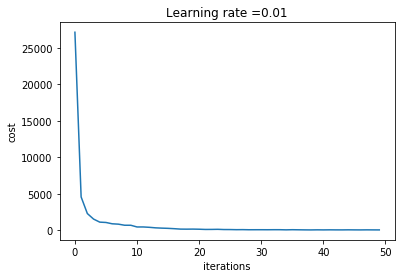

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

We can observe from the graph that the cost reduces as it should. Try using different optimizers and cost functions to get an idea of what works best.

## 6 - Making Predictions

### 6.1 - Making predictions using our model####

- We use `tf.argmax()` to return the index with the largest value across axes of a tensor. This is done to convert the one-hot encoded predictions to simple class labels.
- We use `tf.equal()` to calculate the examples for which the predicted class label was correct.

In [16]:
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(Y, 1)

In [17]:
correct_predictions = tf.equal(predictions, true_labels)

In [18]:
predictions_eval, labels, correct_pred = sess.run([predictions, true_labels, correct_predictions], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

Note that here we input test examples & labels i.e. `mnist.test.images` & `mnist.test.labels`to our model via the `feed_dict` argument.

### 6.2 - Evaluating the accuracy####

We evaluate the accuracy of our model using the `correct_pred` vector.

In [19]:
predictions_eval, labels, correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [27]:
# Calculating the number of predictions out of 10000 that our model labeled correctly
print("Correct predictions: "+str(correct_pred.sum())+"/10000")

Correct predictions: 9587/10000


In [29]:
#Calculating percentage accuracy
print(" Percentage Accuracy: ", (correct_pred.sum()/correct_pred.shape[0])*100)

 Percentage Accuracy:  95.87


**So as you can see, we achieved a pretty good accuracy for such a simple model; we can improve upon this further by tweaking the network structure, training process etc.**